In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from skompiler import skompile

In [2]:
df = pd.read_csv("hmelq.csv")
df.head(5)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
df.dropna(inplace = True)

In [4]:
df_dummies = pd.get_dummies(df)

# DecisionTreeClassifier

In [42]:
X = df_dummies.drop("bad", axis = 1)
y = df_dummies["bad"]
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 42)

In [43]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [44]:
y_pred = cart_model.predict(X_test)

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9386138613861386


In [46]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[457,   9],
       [ 22,  17]], dtype=int64)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       466
           1       0.65      0.44      0.52        39

    accuracy                           0.94       505
   macro avg       0.80      0.71      0.75       505
weighted avg       0.93      0.94      0.93       505



In [48]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[1] <= 30859.0 else 0 if x[14] <= 0.5 else 1) if x[9] <= 
    32.76449966430664 else 0 if x[3] <= 1.5 else 1) if x[0] <= 9050.0 else 
    (((0 if x[4] <= 0.5 else 0 if x[3] <= 2.5 else 1) if x[2] <= 45602.0 else
    1 if x[11] <= 0.5 else 0) if x[0] <= 12750.0 else 0 if x[0] <= 39650.0 else
    1) if x[9] <= 43.77349853515625 else 1) if x[2] <= 48600.0 else (1 if x
    [9] <= 37.44599914550781 else 0) if x[6] <= 44.345001220703125 else ((1 if
    x[8] <= 1.5 else (((1 if x[3] <= 4.0 else 0 if x[13] <= 0.5 else 1) if 
    x[6] <= 60.404998779296875 else ((((0 if x[0] <= 6850.0 else 1) if x[2] <=
    58139.5 else (1 if x[1] <= 68316.0 else 0) if x[3] <= 1.5 else 0) if x[
    2] <= 121579.0 else 1 if x[3] <= 7.0 else 0) if x[4] <= 0.5 else 1 if x
    [6] <= 160.40499877929688 else 0) if x[0] <= 6950.0 else (((((1 if x[9] <=
    33.51150035858154 else 0) if x[1] <= 38380.5 else ((1 if x[9] <= 
    35.37899971008301 else 0) if x[10] <= 0.5 else 0) if x[5] <= 0.5 else 1 if
    x[

In [49]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
cart_params = { "max_depth": range(1,50),
                "min_samples_leaf": list(range(2,100)),
                "min_samples_split": [2, 3, 4, 5, 10, 15, 20, 30, 40, 45, 60, 70, 80, 100],
              }

In [51]:
cart_cv = GridSearchCV(cart, cart_params, cv=10, n_jobs= -1, verbose=3)

In [79]:
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 67228 candidates, totalling 672280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2188 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 7308 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 14476 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 23692 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 34956 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 48268 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 63628 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 81036 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 100492 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 121996 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 145548 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 171148 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 198796 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done

In [52]:
cart_cv_model.best_params_

NameError: name 'cart_cv_model' is not defined

In [53]:
cart_new = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 11, min_samples_split= 20)

In [54]:
cart_tuned = cart_new.fit(X_train, y_train)

In [55]:
y_pred_tuned = cart_tuned.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tuned))

Accuracy: 0.9366336633663367


In [59]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       466
           1       0.61      0.49      0.54        39

    accuracy                           0.94       505
   macro avg       0.79      0.73      0.75       505
weighted avg       0.93      0.94      0.93       505



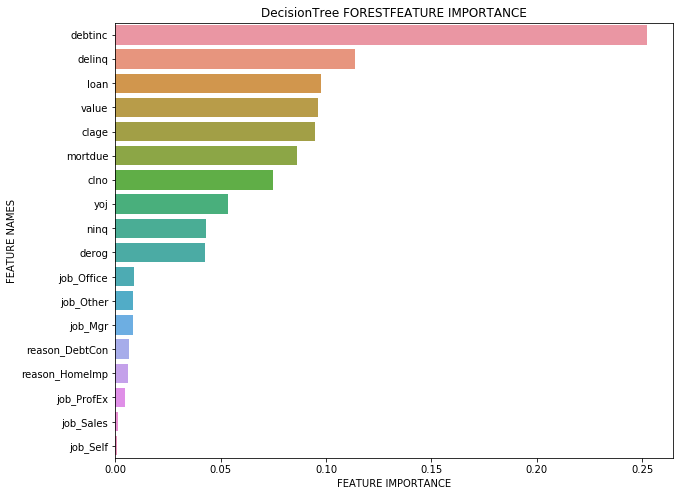

In [61]:
plot_feature_importance(rf_tuned.feature_importances_, X_train.columns,'DecisionTree FOREST')

In [91]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,50), dpi=300)

tree.plot_tree(cart_tuned,
           filled = True);

fig.savefig('imagename.png')

# RandomForest

In [5]:
X = df_dummies.drop("bad", axis = 1)
y = df_dummies["bad"]
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 42)

In [6]:
rf = RandomForestClassifier()

In [7]:
rf_model = rf.fit(X_train, y_train)

In [8]:
y_pred = rf_model.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9544554455445544


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       466
           1       1.00      0.41      0.58        39

    accuracy                           0.95       505
   macro avg       0.98      0.71      0.78       505
weighted avg       0.96      0.95      0.95       505



In [11]:
rf_roc_auc = roc_auc_score(y_test, y_pred)
rf_roc_auc

0.7051282051282051

In [12]:
"max_features": ["auto", "sqrt", "log2"],

SyntaxError: invalid syntax (<ipython-input-12-fad69fdda4a5>, line 1)

In [13]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
rf_params = {   "n_estimators": [100, 500, 1500, 2500],
                 
                 "max_depth": [2, 3, 4, 5, 10, 15, 20, 30, 50],
                 "min_samples_leaf": [2, 3, 4, 5, 10, 15, 20],
                 "min_samples_split": [2, 3, 5, 10, 15, 20]}

In [15]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs= -1, verbose = 2)

In [16]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 1512 candidates, totalling 15120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 46.4min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 56.1min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 67.2min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 81.2min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [17]:
rf_cv_model.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [18]:
rf_tuned = RandomForestClassifier(max_depth= 20,
 min_samples_leaf= 2,
 min_samples_split= 3,
 n_estimators= 100)

In [26]:
rf_tuned = rf_tuned.fit(X_train, y_train)

In [27]:
y_pred_tuned = rf_tuned.predict(X_test)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tuned))

Accuracy: 0.9584158415841584


In [29]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       466
           1       1.00      0.46      0.63        39

    accuracy                           0.96       505
   macro avg       0.98      0.73      0.80       505
weighted avg       0.96      0.96      0.95       505



In [37]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_,  X_train.columns} )

SyntaxError: invalid syntax (<ipython-input-37-dd33a95dcbd4>, line 1)

In [40]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

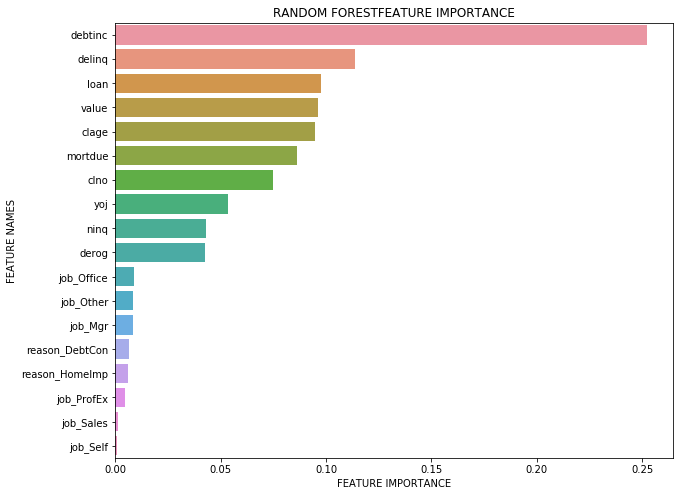

In [41]:
plot_feature_importance(rf_tuned.feature_importances_, X_train.columns,'RANDOM FOREST')

# Neural network

In [5]:
X = df_dummies.drop("bad", axis = 1)
y = df_dummies["bad"]
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 42)

In [34]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=42)

In [35]:
mlp

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [36]:
mlp_model = mlp.fit(X_train, y_train)

In [37]:
y_pred = mlp_model.predict(X_test)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9227722772277228


In [39]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       0.00      0.00      0.00        39

    accuracy                           0.92       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.85      0.92      0.89       505



In [28]:
mlp_params = { "alpha": [0.1, 0.01, 0.02, 0.005],
             "hidden_layer_sizes": [(5, 2), (20, 20), (100, 50, 150), (300, 200, 150), (100, 20)],
             "activation": ["relu", "logistic"],
             "solver" : ['lbfgs', 'sgd', 'adam']}

In [29]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, n_jobs = -1, verbose = 2)

In [30]:
mlp_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 17.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=1e-05,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(5, 2),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=...
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['

In [31]:
mlp_cv_model.best_params_

{'activation': 'logistic',
 'alpha': 0.02,
 'hidden_layer_sizes': (20, 20),
 'solver': 'lbfgs'}

In [33]:
mlp_tuned = MLPClassifier(activation= 'logistic',
 alpha= 0.02,
 hidden_layer_sizes= (20, 20),
 solver= 'lbfgs')

In [40]:
mlp_tuned = mlp_tuned.fit(X_train, y_train)

In [41]:
y_pred_tuned = mlp_tuned.predict(X_test)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tuned))

Accuracy: 0.9207920792079208


In [42]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       466
           1       0.00      0.00      0.00        39

    accuracy                           0.92       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.85      0.92      0.88       505

